In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import seaborn as sns
sns.set()

In [25]:
df = pd.read_csv('car.csv')
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
df.shape

(205, 15)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


In [28]:
df.isnull().sum()

symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [29]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [30]:
data = df.copy()

In [31]:
data.duplicated().sum()

2

In [32]:
data.drop_duplicates(inplace = True)

In [33]:
data.duplicated().sum()

0

In [34]:
x = data.drop(columns = ['price'], axis = 1)
y = data['price']

In [35]:
model1 = LinearRegression()

In [36]:
model1.fit(x, y)

LinearRegression()

In [37]:
model1.score(x, y)

0.8510123345480501

In [38]:
model1.coef_

array([ 2.82276459e+02,  1.70198770e+02, -9.64000808e+01,  4.64565320e+02,
        1.91781451e+02,  1.87903297e+00,  1.16772975e+02, -1.00533856e+03,
       -3.05574176e+03,  2.87331988e+02,  3.24661411e+01,  2.35857828e+00,
       -2.90777593e+02,  1.93136517e+02])

In [39]:
model1.intercept_

-51219.7161883381

In [40]:
r2 = model1.score(x, y)
n = x.shape[0]
p = x.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.839917508397373

In [41]:
f_regression(x, y)

(array([  1.268899  ,  99.34555624, 173.64127895, 270.96651946,
          2.50676136, 460.00325418, 646.27744648,  86.92554226,
          1.32051508,   0.86139036, 378.26280812,   1.28587524,
        178.63480858, 190.32775695]),
 array([2.61316400e-01, 2.85814096e-19, 5.45976461e-29, 4.09124771e-39,
        1.14930825e-01, 7.38474564e-54, 1.02936323e-64, 2.08256116e-17,
        2.51865204e-01, 3.54463069e-01, 4.39961560e-48, 2.58160110e-01,
        1.43233594e-29, 6.68279607e-31]))

In [42]:
p_values = f_regression(x, y)[1]
p_values.round(3)

array([0.261, 0.   , 0.   , 0.   , 0.115, 0.   , 0.   , 0.   , 0.252,
       0.354, 0.   , 0.258, 0.   , 0.   ])

In [43]:
x.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [44]:
x_n = data[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 
            'highwaympg']]

In [46]:
model2 = LinearRegression()

In [47]:
model2.fit(x_n, y)

LinearRegression()

In [48]:
model2.score(x_n, y)

0.8213524215194314

In [49]:
model2.coef_

array([  113.63542187,   -60.63225943,   529.73105281,     2.92343229,
          83.56338321, -1170.52541726,    53.84273517,  -123.57702542,
         123.92886324])

In [50]:
model2.intercept_

-42777.176679751756

In [51]:
r2_n = model2.score(x_n, y)
n = x_n.shape[0]
p = x_n.shape[1]
adjusted_r2_n = 1 - (1 - r2_n) * (n - 1) / (n - p - 1)
adjusted_r2_n

0.8130217054244826

In [52]:
f_regression(x_n, y)

(array([ 99.34555624, 173.64127895, 270.96651946, 460.00325418,
        646.27744648,  86.92554226, 378.26280812, 178.63480858,
        190.32775695]),
 array([2.85814096e-19, 5.45976461e-29, 4.09124771e-39, 7.38474564e-54,
        1.02936323e-64, 2.08256116e-17, 4.39961560e-48, 1.43233594e-29,
        6.68279607e-31]))

In [56]:
p_values_n = f_regression(x_n, y)[1]
p_v_n = p_values_n.round(3)
p_v_n

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
y_pred2 = model2.predict(x_n)

In [58]:
x_n.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
0,88.6,168.8,64.1,2548,130,3.47,111,21,27
1,88.6,168.8,64.1,2548,130,3.47,111,21,27
2,94.5,171.2,65.5,2823,152,2.68,154,19,26
3,99.8,176.6,66.2,2337,109,3.19,102,24,30
4,99.4,176.6,66.4,2824,136,3.19,115,18,22


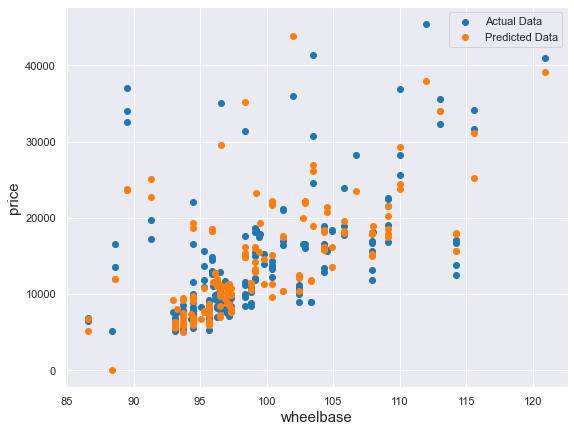

In [61]:
plt.figure(figsize = (9, 7))
plt.scatter(x_n['wheelbase'], y, c = '#1f77b4', label = 'Actual Data')
plt.scatter(x_n['wheelbase'], y_pred2, c = '#ff7f0e', label = 'Predicted Data')
plt.xlabel('wheelbase', fontsize = 15)
plt.ylabel('price', fontsize = 15)
plt.legend()
plt.show()